# 4 - Detecção de Overfitting - Conceitos

## 4.1 - O que é Overfitting
vamos falar sobre como detectar e evitar o overfitting em modelos de Machine Learning e AI. O overfitting ocorre quando um modelo se ajusta excessivamente aos dados de treinamento, mas não tem um bom desempenho em dados novos. Isso pode acontecer devido à complexidade do modelo, variáveis irrelevantes ou treinamento excessivo. Para evitar o overfitting, podemos aplicar técnicas como regularização, validação cruzada e simplificação do modelo. Vamos visualmente identificar modelos ótimos, com baixo erro de treinamento e teste, e modelos com underfitting e overfitting.

## 4.2 -KNN - Conceito
O algoritmo K-NN, ou K-Nearest Neighbors, é um método utilizado para classificação e regressão. Ele funciona com base na ideia de que instâncias de dados semelhantes estão próximas umas das outras em um espaço de características. Quando um novo ponto de dado é introduzido, o K-NN identifica os K pontos de dados mais próximos e determina sua classificação ou previsão com base na agregação dos valores ou classes desses vizinhos mais próximos. A escolha do valor de K e da métrica de distância é crucial para o desempenho do algoritmo. O K-NN é conhecido por sua simplicidade e eficácia em problemas de baixa a moderada dimensionalidade.

## 4.3 - Visualização Overfitting - Classificação
Nesta aula, aprendemos como detectar o overfitting em um modelo de classificação. Utilizamos o notebook para carregar os dados e ajustar o DataFrame. Em seguida, treinamos o modelo de regressão logística e o modelo de KNN (K vizinhos mais próximos). Utilizamos um loop para treinar o modelo com diferentes quantidades de vizinhos (K) e armazenamos os scores de treinamento e teste em listas separadas. Em seguida, criamos um gráfico para visualizar esses scores e identificar possíveis casos de overfitting. Observamos que, ao alterar o hiperparâmetro K, a diferença entre os scores de treinamento e teste pode diminuir ou aumentar. Isso nos ajuda a encontrar o conjunto de hiperparâmetros que oferece uma boa performance e evita o overfitting.

In [8]:
# Importando Bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from numpy import linspace, mean
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, learning_curve, LearningCurveDisplay
from sklearn.metrics import mean_squared_error

In [19]:
# Carregar dataset
df = pd.read_csv('dataset_colesterol.csv')
df.head()

,Id,Grupo Sanguíneo,Fumante,Nível de Atividade,Idade,Peso,Altura,Colesterol
0,1,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,2,A,Não,Moderado,68.0,105.0,184.0,236.98
2,3,O,Não,Alto,25.0,64.8,180.0,161.79
3,4,A,Não,Alto,43.0,120.2,167.0,336.24
4,5,AB,Não,Baixo,79.0,88.5,175.0,226.23


In [21]:
# Tratar Nulo

# Coletar medidas das variáveis categóricas (Moda)
moda_grupo_sang = df['Grupo Sanguíneo'].mode()
moda_fumante = df['Fumante'].mode()
moda_nivel_atividade = df['Nível de Atividade'].mode()

In [22]:
# Coletar medidas das variáveis numéricas (Mediana)
mediana_idade = df.Idade.median()
mediana_peso = df.Peso.median()
mediana_altura = df.Altura.median()

In [23]:
# Imputar quando valores são ausentes
# A moda pode resultar em mais de um valor, por isso pegar a primeira que está no índice 0
df.fillna(value={'Grupo Sanguíneo': moda_grupo_sang[0],
                                'Fumante': moda_fumante[0],
                                'Nível de Atividade': moda_nivel_atividade[0],
                                'Idade': mediana_idade,
                                'Peso': mediana_peso,
                                'Altura': mediana_altura}, inplace=True)

In [24]:
# ajustar Data Frame
df.drop('Id', axis=1, inplace=True)

In [26]:
# Aplicar o OneHotEncoder
df = pd.get_dummies(df, columns=['Grupo Sanguíneo', 'Fumante', 'Nível de Atividade'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Idade                        1000 non-null   float64
 1   Peso                         1000 non-null   float64
 2   Altura                       1000 non-null   float64
 3   Colesterol                   1000 non-null   float64
 4   Grupo Sanguíneo_A            1000 non-null   uint8  
 5   Grupo Sanguíneo_AB           1000 non-null   uint8  
 6   Grupo Sanguíneo_B            1000 non-null   uint8  
 7   Grupo Sanguíneo_O            1000 non-null   uint8  
 8   Fumante_Não                  1000 non-null   uint8  
 9   Fumante_Sim                  1000 non-null   uint8  
 10  Nível de Atividade_Alto      1000 non-null   uint8  
 11  Nível de Atividade_Baixo     1000 non-null   uint8  
 12  Nível de Atividade_Moderado  1000 non-null   uint8  
dtypes: float64(4), uint

## 4.4 - Treinar Modelo de Regressão Linear, visualizando a curva de aprendizado

In [28]:
# Separar X e y
X = df.drop('Colesterol', axis=1)
y = df.Colesterol

In [29]:
# criar Modelo
model_reg = LinearRegression()

In [31]:
# Gerar Scores de Curva de Aprendizado - Regressão
# O learning_curve() grava numa lista quais os scores que ele obteve no treino e quais os scores que ele obteve no teste, 
# ou seja, ele já faz a validação, no caso aqui estamos falando de fazer uma validação usando o mean squared error, no conjunto de treinamento e no conjunto de testes.
# Então não preciso fazer um fit, depois um predict, para depois calcular predição com base no conjunto de treinamento. 
# Esse learning curve já faz tudo isso para a gente, armazenando tudo isso em listas que a gente pode utilizar e plotar o nosso gráfico.
train_size_abs, train_scores, test_scores = learning_curve(model_reg, X, y, train_sizes=linspace(0.1, 0.9, 9), scoring='neg_mean_squared_error', cv=3)

In [32]:
# Train Scores
train_scores

array([[-47.58887954, -76.06366161, -76.06366161],
       [-55.94085705, -89.01851692, -89.01851692],
       [-62.13837115, -82.18525175, -82.18525175],
       [-74.55475829, -81.21326607, -81.21326607],
       [-71.61082025, -86.52791925, -86.52791925],
       [-70.37838766, -82.51458626, -81.93016302],
       [-71.49315257, -81.861724  , -79.2884534 ],
       [-72.07692592, -80.64444692, -78.88144963],
       [-74.77553591, -82.41774701, -82.43288471]])

In [33]:
train_size_abs

array([ 66, 133, 199, 266, 333, 399, 466, 532, 599])

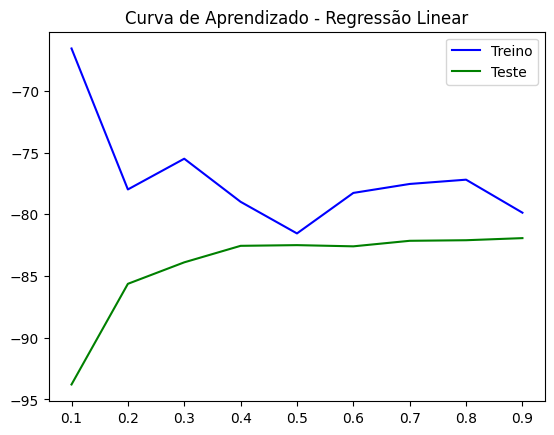

In [34]:
# Gerar Plot com Curvade Aprendizado
plt.plot(linspace(0.1, 0.9, 9), mean(train_scores, axis=1), color='b', label='Treino')
plt.plot(linspace(0.1, 0.9, 9), mean(test_scores, axis=1), color='g', label='Teste')
plt.title('Curva de Aprendizado - Regressão Linear')
plt.legend()
plt.show()